In [1]:
import json
import numpy as np
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import seaborn as sns
from functions.formatting import snake_to_pascal_case
from functions.plotting import plot_single_scatter, plot_corr, plot_histogram

with open('.db/postgres.json') as f:
    cred = json.load(f)
    username = cred.get("user")
    password = cred.get("password")
    host = cred.get("host")
    port = cred.get("port")
    
db_name = "mountain_project"
connection_str = f'postgres://{username}:{password}@{host}:{port}/{db_name}' # sqlalchemy connection args
pd.set_option('max_rows', 5)

In [ ]:
save=True

# Get Data

In [3]:
query = """
SELECT b.id_, b.avg_stars, b.length_, b.grade,
       r.star_ratings, r.on_to_do_lists, r.ticks
FROM routes b
LEFT JOIN ratings r ON b.url_id = r.url_id
WHERE b.area_name IN ('buttermilks', 'druid_stones', 'happy_boulders', 'sad_boulders')
  AND length_ IS NOT NULL
;
"""
df = pd_sql.read_sql(query, connection_str) # grab data as a dataframe
df = df.drop(columns = 'id_').reset_index(drop=True)
df.columns = [snake_to_pascal_case(col) for col in df.columns] # rename columns
df

,AvgStars,Length,Grade,StarRatings,OnToDoLists,Ticks
0,1.3,10.0,-1.0,30,8,52
1,2.0,15.0,-1.0,1,0,1
...,...,...,...,...,...,...
1008,3.0,15.0,12.0,1,3,0
1009,3.5,25.0,12.0,2,4,1


# Pairgrid and Correlation Matrix

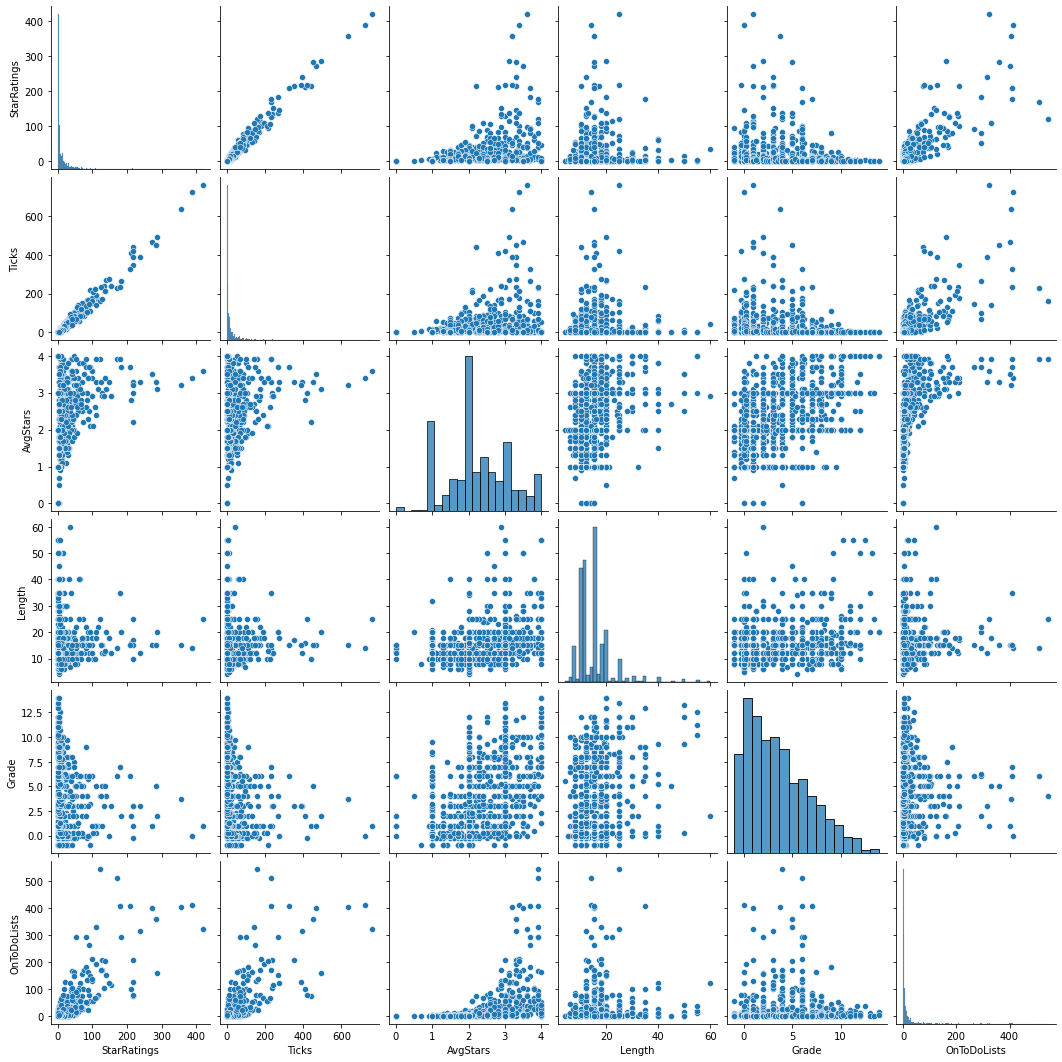

In [4]:
# Pairplot
features_target_list = ['StarRatings', 'Ticks', 'AvgStars', 'Length', 'Grade', 'OnToDoLists']
pairgrid = sns.pairplot(df[features_target_list])
pairgrid.fig
if save:
    plt.savefig("figures/eda/baseline-pairplot.png", transparent=True, bbox_inches="tight")

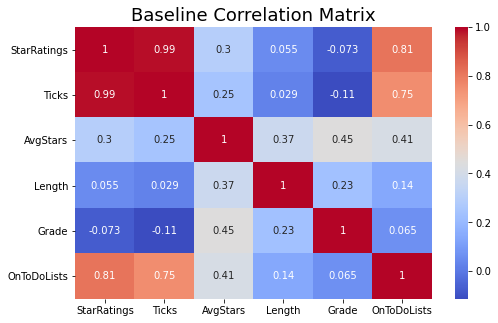

In [5]:
# Plot heatmap
fig = plot_corr(df, 'Baseline Correlation Matrix',
                order = ['StarRatings', 'Ticks', 'AvgStars', 'Length', 'Grade', 'OnToDoLists'])

if save:
    plt.savefig("figures/eda/baseline-corr.png", transparent=True, bbox_inches="tight")

# Features vs. Target

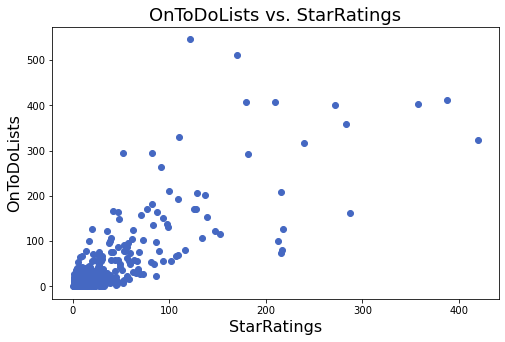

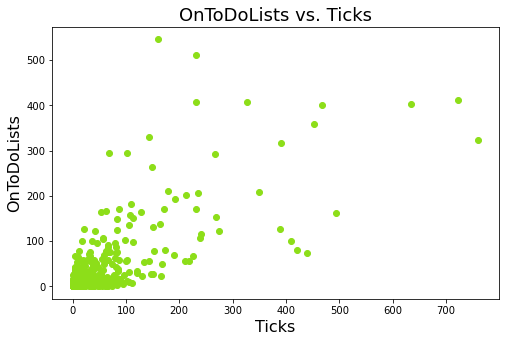

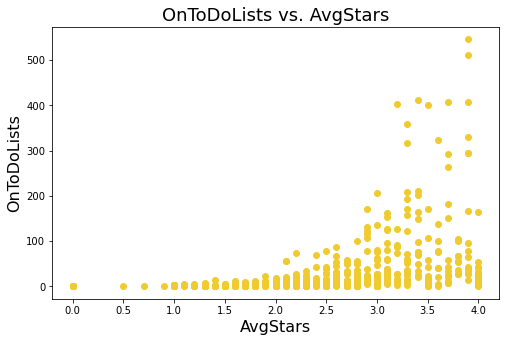

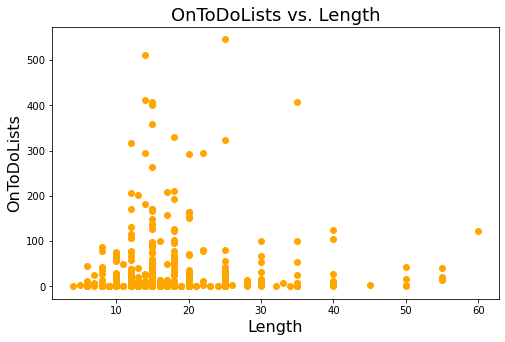

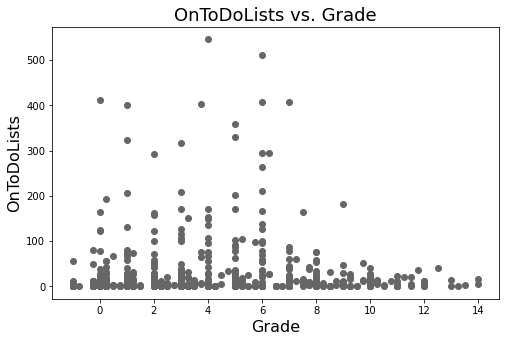

In [6]:
# Plot scatter
x_list = [('StarRatings', '#4568c2'),
          ('Ticks', '#8dde19'),
          ('AvgStars', '#f0cb2f'),
          ('Length', '#ffa500'),
          ('Grade', '#666666')]
y = 'OnToDoLists'

for x, color in x_list:
    fig = plot_single_scatter(df, x, y,
                              title=f'{y} vs. {x}',
                              color=color)
    if save:
        plt.savefig(f"figures/eda/{x.lower()}-{y.lower()}.png", transparent=True, bbox_inches="tight")

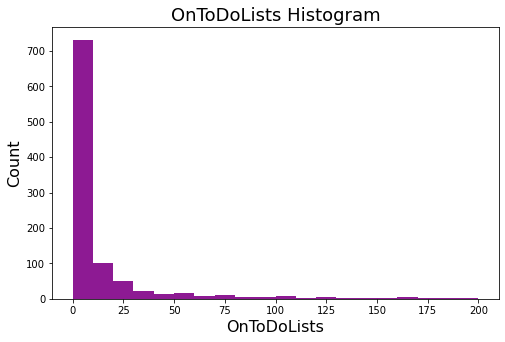

In [7]:
fig = plot_histogram(df, 'OnToDoLists', bins=np.arange(0, 201, 10),
                     xlabel='OnToDoLists',
                     ylabel='Count',
                     title='OnToDoLists Histogram',
                    )
if save:
    plt.savefig("figures/eda/ontodolists-hist.png",
                transparent=True, bbox_inches="tight")